# Transformée de Fourier

Discret Fourier Transform - DFT (algorithm : Fast Fourier Transform = FFT)

$N$ points $x_i$

$$ \tilde x_k = \sum_i x_i e^{-2j\pi k\frac{i}{N}}$$

Signal de durée $T$ échantillonée avec $dt$ : $T = N dt$

Fréquence minimum : $1/T$

Fréquence maximum : $\frac 1{2dt}$ (Nyquist)

Le point $\tilde x_k$ a une fréquence $k/T$

Attention : la DFT suppose implicitement que la fonction est périodique de période $T$.

Utilisation : filtre, convolution. 

FFT : complexité en $N \log(N)$

Librairie numpy : 
* `np.fft.fft`; `np.fft.ifft`
* `np.fft.rfft`; `np.fft.irfft` (signaux réél -> fréquences >0). Evite les nb complexe
* `np.fft.fftfreq`; `np.fft.fftshift`

## Exemple : bruit d'une machine à laver le linge (essorage)

Déterminer la fréquence de rotation du tambour
* En visualisant la fréquence sur une transformée de Fourier
* En filtrant le signat à l'aide d'une transformée de Fourier

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io.wavfile import read

## Plot dans le domaine temporel

Text(0, 0.5, 'Amplitude')

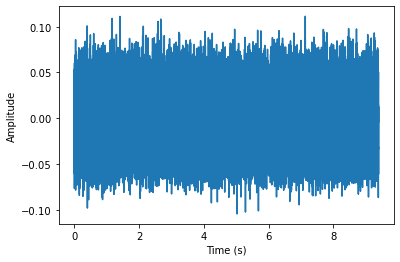

In [2]:
samplerate, amplitude = read('machine_a_laver.wav')

t = np.arange(len(amplitude))/samplerate
plt.plot(t, amplitude)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

Text(0, 0.5, 'Amplitude')

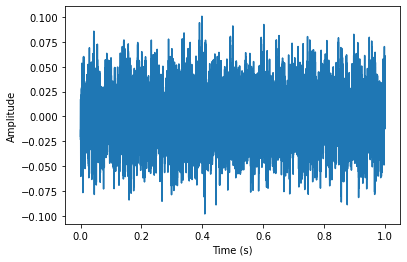

In [3]:
samplerate, amplitude = read('machine_a_laver.wav')

t = np.arange(len(amplitude))/samplerate

mask = t<1

plt.plot(t[mask], amplitude[mask])
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

## Transformée de Fourier

Text(0, 0.5, 'TF')

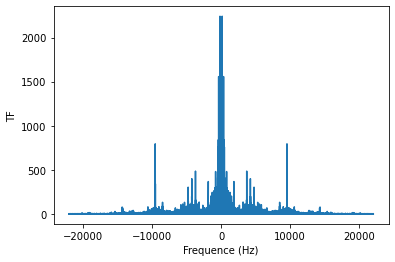

In [4]:
amplitude_tilde = np.fft.fft(amplitude)
freq = np.fft.fftfreq(len(amplitude), d=1/samplerate)

plt.plot(np.fft.fftshift(freq), np.fft.fftshift(np.abs(amplitude_tilde)), '-')
plt.xlabel('Frequence (Hz)')
plt.ylabel('TF')

Text(0.5, 1.0, 'Zoom sur la fréquence de rotation du tambour')

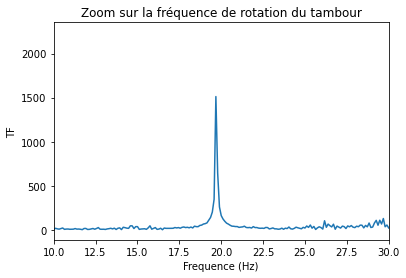

In [6]:
plt.plot(np.fft.fftshift(freq), np.fft.fftshift(np.abs(amplitude_tilde)), '-')
plt.xlim(10, 30)
plt.xlabel('Frequence (Hz)')
plt.ylabel('TF')
plt.title('Zoom sur la fréquence de rotation du tambour')

## Densité spectrale de puissance

In [7]:
from scipy.signal import periodogram

freq, psd = periodogram(amplitude, samplerate)

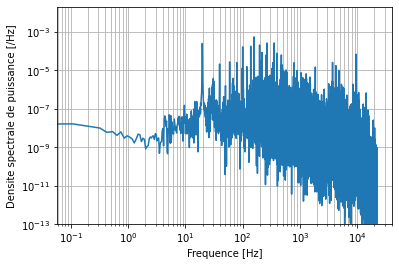

In [8]:
#mask = (freq>=10) & (freq<50)
plt.loglog(freq, psd)
plt.grid(which='both')

plt.ylim(1E-13, None)

plt.xlabel('Frequence [Hz]')
plt.ylabel('Densite spectrale de puissance [/Hz]');

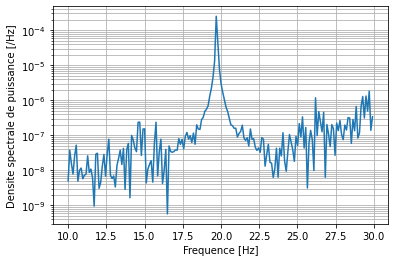

In [9]:
mask = (freq>=10) & (freq<30)
plt.semilogy(freq[mask], psd[mask])
plt.grid(which='both')

plt.xlabel('Frequence [Hz]')
plt.ylabel('Densite spectrale de puissance [/Hz]');

## Filtrage

In [10]:
# Utilisation de la FFT pour faire un filtre : 
# On utiliser rfft et irfft car signaux réels
def passe_bas(signal, f_c, samplerate=44100):
    signal_tilde = np.fft.rfft(signal)
    freqs = np.fft.rfftfreq(len(signal), 1/samplerate)
    H = 1/(1+1J*(freqs/f_c))
    signal_2 = np.fft.irfft(signal_tilde*H)
    return signal_2

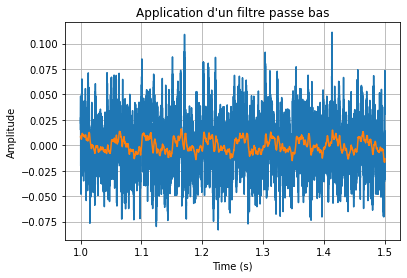

In [11]:
mask = (t>1) & (t<1.5)

plt.plot(t[mask], amplitude[mask])
plt.plot(t[mask], passe_bas(amplitude, f_c=30)[mask])
plt.title("Application d'un filtre passe bas")
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid()

Fréquence : 19.68 Hz


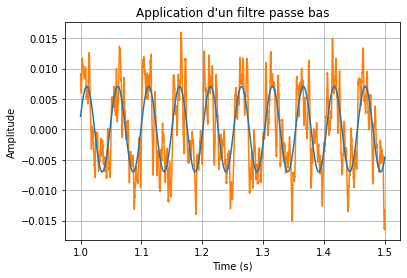

In [12]:
# Pour s'amuser

from scipy.optimize import curve_fit

def modele(t, amplitude, offset, frequence, phase):
    return offset + amplitude*np.sin(2*np.pi*t*frequence + phase)

plt.plot(t[mask], passe_bas(amplitude, f_c=30)[mask], 'C1')
t_plot = np.linspace(1, 1.5, 201)

p0 = (0.01, 0, 20, 0)
popt, pcov = curve_fit(modele, t[mask], passe_bas(amplitude, f_c=30)[mask], p0)
plt.plot(t_plot, modele(t_plot, *popt))

plt.title("Application d'un filtre passe bas")
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid()

print(f'Fréquence : {popt[2]:.2f} Hz')